# Análise palavras fontes de dados

In [35]:
# Modulos da propria aplicacao
from fonte_dados.fabrica import FabricaFonteDados, NERDS_VIAJANTES, WIKIPEDIA
from repository.verbos import VerbosRepo

from repository.mongo_utils import get_pages_content_collection
from repository.wikipedia import WikipediaRepo

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

## Obtenção de informações de palavras de fontes de dados

In [13]:
fabrica = FabricaFonteDados()
verbo_repo = VerbosRepo()
verbos_stemmed = verbo_repo.find_all_stemmed()

In [5]:
def obter_tokens_nao_verbo(documento):
    return [token for token in documento if token not in verbos_stemmed]

def obter_documentos_sem_verbo(documentos):
    return [obter_tokens_nao_verbo(documento) for documento in documentos]

def obter_tamanhos_documentos(documentos):
    return [len(doc) for doc in documentos]

In [8]:
def obter_informacoes_palavras(descricao_fonte_de_dados):
    fonte_dados_origem = fabrica.get_fonte_dados(NERDS_VIAJANTES)
    fonte_dados_origem.carregar_dados()
    documentos_origem = fonte_dados_origem.get_tokens()
    tamanhos_documentos = obter_tamanhos_documentos(documentos_origem)
    documentos_sem_verbo = obter_documentos_sem_verbo(documentos_origem)
    tamanhos_sem_verbo = obter_tamanhos_documentos(documentos_sem_verbo)
    percentual_nao_verbo = 100 * (np.array(tamanhos_sem_verbo) / np.array(tamanhos_documentos))
    return pd.DataFrame(
        data = { 
            'documento': documentos_origem, 
            'tamanho': tamanhos_documentos, 
            'documento_nao_verbo': documentos_sem_verbo, 
            'tamanho_sem_verbo': tamanhos_sem_verbo,
            'percentual_nao_verbo': percentual_nao_verbo
        })

## Análises gráficas de palavras de fontes de dados

In [ ]:
"""
Distribuicao de tokens que nao sao verbo nos documentos.
"""
def analisar_distribuicao_percentual_nao_verbo(informacoes_fonte_de_dados):
    sns.displot(informacoes_fonte_de_dados, x='percentual_nao_verbo', kind='hist', aspect=1.2)

In [42]:
"""
Distribuicao de tamanhos de documentos diferenciando por conter verbo ou nao.
"""
def analisar_distribuicao_tamanhos_documentos(informacoes_fonte_de_dados, bidimensional=False, x_max=5000):
    if bidimensional:
        tidy = informacoes_fonte_de_dados[informacoes_fonte_de_dados['tamanho'] <= x_max]
        sns.displot(tidy, x='tamanho', y='tamanho_sem_verbo', kind='hist', aspect=1.2, height=6)
    else:
        tidy = informacoes_nv[['tamanho', 'tamanho_sem_verbo']].melt().rename(columns={'variable': 'descricao_tamanho' })
        sns.displot(tidy, x='value', kind='hist', aspect=1.2, hue='descricao_tamanho', kde=True, multiple='dodge')

In [59]:
"""
Distribuicao de tamanhos dos documentos. O parametro indicador_tamanho eh usado para definir se o tamanho eh o original ou 
o tamanho sem verbo. Possiveis valores: 'tamanho', 'tamanho_sem_verbo'
"""
def analisar_distribuicao_tamanhos(informacoes_fonte_de_dados, indicador_tamanho='tamanho', x_max=5000):
    limitado = informacoes_fonte_de_dados[informacoes_fonte_de_dados[indicador_tamanho] <= x_max]
    sns.displot(limitado, x=indicador_tamanho, kind='hist', aspect=1.2)

## Análise palavras - Nerds Viajantes

In [50]:
informacoes_fonte_de_dados = obter_informacoes_palavras(NERDS_VIAJANTES)

## Análise fonte de dados selecionada

### Distribuição de percentuais de tokens não verbo no documento

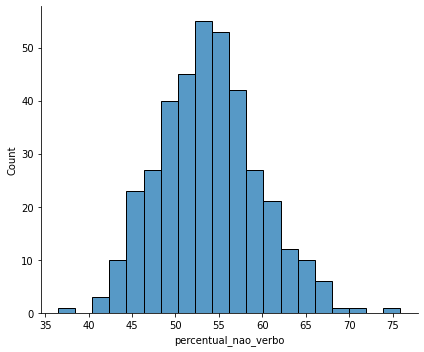

In [51]:
analisar_distribuicao_percentual_nao_verbo(informacoes_fonte_de_dados)

### Distribuição de tamanho de documento

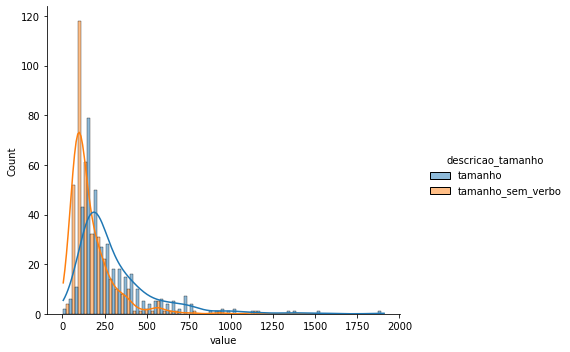

In [52]:
analisar_distribuicao_tamanhos_documentos(informacoes_fonte_de_dados)

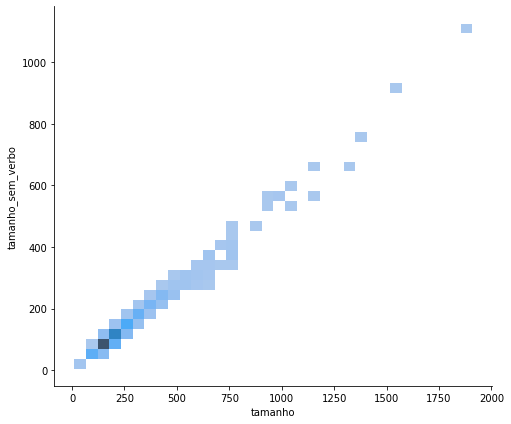

In [53]:
analisar_distribuicao_tamanhos_documentos(informacoes_fonte_de_dados, bidimensional=True)

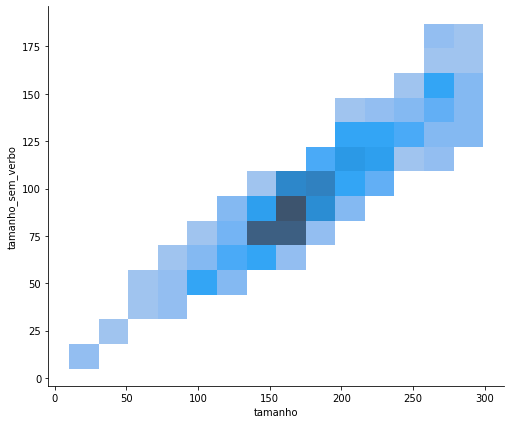

In [54]:
analisar_distribuicao_tamanhos_documentos(informacoes_fonte_de_dados, bidimensional=True, x_max=300)

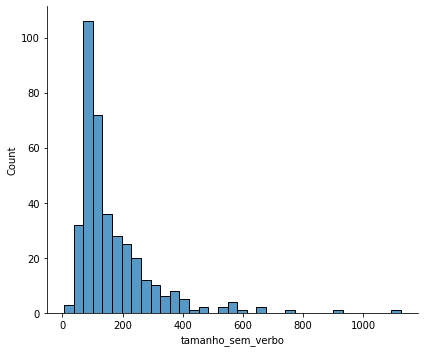

In [55]:
sns.displot(informacoes_fonte_de_dados, x='tamanho_sem_verbo', kind='hist', aspect=1.2)

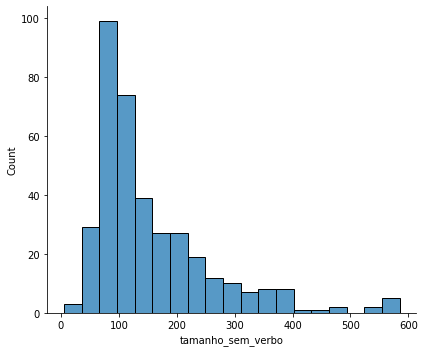

In [58]:
limitado = informacoes_fonte_de_dados[informacoes_fonte_de_dados['tamanho_sem_verbo'] <= 600]
sns.displot(limitado, x='tamanho_sem_verbo', kind='hist', aspect=1.2)